In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt

from common import mockservation as ms

## Create Image with Single Fourier Mode

In order to test the implmentation of FFT and iFFT, we use anisotropic FoV and anisotropic resolution.

Peak "brightness" is 1.

(32, 64) 12.566370614359172 6.283185307179586
1.0 -1.0


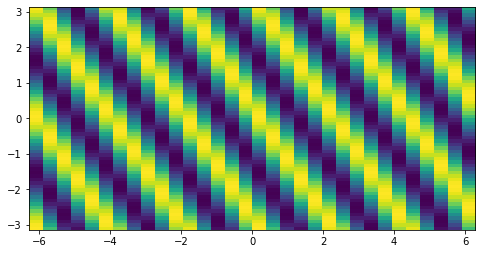

In [2]:
width  = 4 * np.pi
height = 2 * np.pi

x = np.linspace(-width /2, width /2, num=32, endpoint=False)
y = np.linspace(-height/2, height/2, num=64, endpoint=False)

X, Y = np.meshgrid(x, y, indexing='ij')
F = np.cos(3*X + 2*Y)
#F = np.cos(3*X) * np.cos(2*Y)
#F = np.exp(-0.5*(X*X + Y*Y))

plt.figure(figsize=(8, 8))
plt.imshow(F.T, origin='lower', interpolation=None, extent=[-width/2, width/2, -height/2, height/2])

print(F.shape, width, height)
print(np.max(F), np.min(F))

## Perform FFT without Any Padding

We manually force the original image resolution when applying FFT.

The resulting FFT should have only one bright pixels, corresponding to the Fourier mode that we constructed.

(32, 33) 2.5464790894703255 10.185916357881302
1024.0 8.575866012098123e-16


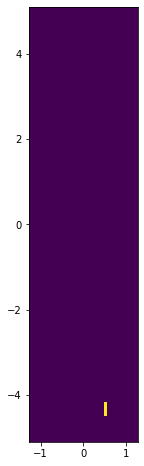

In [3]:
S, U, V = ms.upfft(F, width, height, N=[32,64])

plt.figure(figsize=(8, 8))
plt.imshow(abs(S.T), origin='lower', interpolation=None, extent=[-U/2, U/2, -V/2, V/2])

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))

## Perform Forward Transform with Automatic Padding

Try default choice to make spectral domain resolution more isotropic.

(32, 64) -> [ 32 128]
(32, 65) 2.5464790894703255 10.185916357881302
1024.0 2.0251375964178618e-16


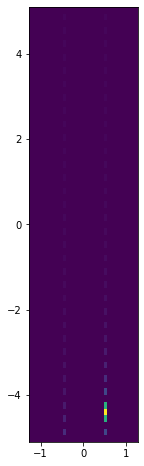

In [4]:
S, U, V = ms.upfft(F, width, height)

plt.figure(figsize=(8, 8))
plt.imshow(abs(S.T), origin='lower', interpolation=None, extent=[-U/2, U/2, -V/2, V/2])

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))

## Perform Forward Transform with Manual Padding

Increase the image domain FoV to increase the visibility domain resolution.

(256, 513) 2.5464790894703255 10.185916357881302
1024.0 0.0


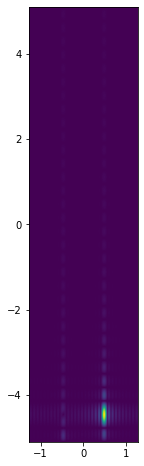

In [5]:
S, U, V = ms.upfft(F, width, height, N=[256,1024])

plt.figure(figsize=(8, 8))
plt.imshow(abs(S.T), origin='lower', interpolation=None, extent=[-U/2, U/2, -V/2, V/2])

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))